In [1]:
!pip install  tensorflow
!pip install numpy
!pip install panda

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 421.8 MB 42 kB/s s eta 0:00:01  |                                | 1.1 MB 903 kB/s eta 0:07:46     |▍                               | 4.5 MB 903 kB/s eta 0:07:42     |▍                               | 5.6 MB 903 kB/s eta 0:07:41     |▋                               | 8.8 MB 903 kB/s eta 0:07:38     |█▋                              | 21.5 MB 10.7 MB/s eta 0:00:38     |██                              | 27.1 MB 10.7 MB/s eta 0:00:37     |██▋                             | 34.6 MB 6.3 MB/s eta 0:01:02     |███                             | 40.1 MB 6.3 MB/s eta 0:01:02     |███▋                            | 47.7 MB 13.7 MB/s eta 0:00:28     |████                            | 52.9 MB 12.4 MB/s eta 0:00:30     |████▊                           | 61.7 MB 12.4 MB/s eta 0:00:3

     |████████████████████████████████| 77 kB 3.8 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.0-cp37-cp37m-linux_x86_64.whl size=70936 sha256=91ea58009c66274911ee5d4ed6d482b52d72b0bdbf3d391edb0dd125d6b1c651
  Stored in directory: /home/jovyan/.cache/pip/wheels/e5/78/69/f40ab7cae531c8f07003a9d1b4b81ebec14cda95519c57e7dd
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7540 sha256=091d61998866eac722342bbef58423b9c99671c68954308cd7dc0cc979685768
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-py3-none-any.whl size=61681 sha256=f7f0ecad50b9f0b87c9ef663718b985c3a8dbb9a124b9d58daf6a2b73ee6432a
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/e3/31/0d3919995e859eff01713d381aac3b6b43c69915a2942e5c65
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=1add25e60fd9130f91d71dbe55a262aad0325e

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.40316775, -0.42857623,  0.0511319 ,  0.3815679 , -0.9618149 ,
        -0.21777306, -0.40077442,  0.785008  , -0.3138573 ,  0.20466936]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()


array([[0.14023863, 0.06104441, 0.0986235 , 0.13724197, 0.03581486,
        0.07536965, 0.06276536, 0.20544651, 0.06846485, 0.11499021]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [10]:
loss_fn(y_train[:1], predictions).numpy()


2.5853505

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2952 - accuracy: 0.9148
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1446 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1067 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0873 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0743 - accuracy: 0.9771


In [14]:
model.evaluate(x_test,  y_test, verbose=2)


10000/10000 - 0s - loss: 0.0783 - accuracy: 0.9756


[0.07825802709995769, 0.9756]

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.79872330e-07, 1.13395755e-08, 2.86377531e-06, 8.31638827e-05,
        2.58702591e-11, 4.66672589e-07, 4.09418864e-13, 9.99905348e-01,
        1.03419097e-06, 6.85851455e-06],
       [8.45388315e-10, 3.53605137e-04, 9.99646068e-01, 3.05434668e-07,
        2.24563207e-12, 1.36814799e-08, 2.97787350e-09, 5.41119937e-13,
        9.13809473e-09, 1.33343537e-15],
       [3.83839136e-07, 9.99287307e-01, 1.92696098e-04, 8.43679845e-06,
        5.21610673e-05, 4.68386588e-06, 4.33751738e-05, 2.17339446e-04,
        1.92735431e-04, 1.01480396e-06],
       [9.99943137e-01, 7.78865805e-10, 1.36582121e-05, 8.50975042e-08,
        9.41877488e-07, 6.82256371e-07, 2.33372830e-05, 1.51754220e-05,
        2.86815371e-09, 2.94709025e-06],
       [4.00421459e-06, 3.35911530e-08, 8.39266977e-06, 5.61937100e-07,
        9.72770989e-01, 5.21525817e-06, 7.43119745e-06, 1.10053654e-04,
        5.24786010e-05, 2.70408913e-02]], dtype=float32)>

In [2]:
# Fasion images image classification
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
# Load cloth images data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
train_images.shape


(60000, 28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(train_labels)


60000

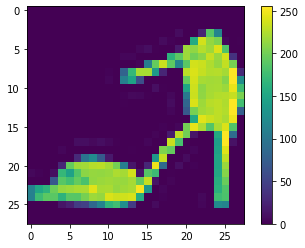

In [20]:
# random show train image
import random
plt.figure()
random_index= random.randint(0,len(train_labels)-1)
plt.imshow(train_images[random_index])
plt.colorbar()
plt.grid(False)
plt.show()